## **Assignment 10**
### **Analisi di Wikipedia**

#### Descrizione del Progetto
Wikidata Insights, un'azienda leader nella gestione di contenuti digitali, è stata incaricata da Wikimedia per ottimizzare l'analisi e la categorizzazione dei contenuti di Wikipedia. Per supportare la loro continua espansione e migliorare l'organizzazione delle informazioni, Wikidata Insights ha deciso di condurre un progetto avanzato di data analysis e machine learning. L'obiettivo principale è comprendere meglio il vasto patrimonio di contenuti informativi offerti da Wikipedia e sviluppare un sistema di classificazione automatica che consenta di categorizzare efficacemente i nuovi articoli futuri.

#### Obiettivi
1. **Analisi Descrittiva dei Contenuti**  
Il primo obiettivo del progetto è condurre un'analisi esplorativa dei dati (EDA) per capire le caratteristiche dei contenuti di Wikipedia suddivisi in diverse categorie tematiche, come ad esempio: - Cultura, Economia, Medicina, Tecnologia, Politica, Scienza, e altre.
L'analisi esplorativa prevede: - Il conteggio degli articoli presenti per ogni categoria. - Il numero medio di parole per articolo. - La lunghezza dell'articolo più lungo e di quello più corto per ciascuna categoria. - La creazione di nuvole di parole rappresentative per ogni categoria, per identificare i termini più frequenti e rilevanti.

2. **Sviluppo di un Classificatore Automatico**  
Il secondo obiettivo è creare un modello di machine learning capace di classificare automaticamente gli articoli in base alla loro categoria. Il sistema di classificazione verrà addestrato utilizzando dati di testo presenti nelle seguenti colonne del dataset: - Sommario (summary): Introduzione breve dell'articolo. - Testo Completo (documents): Contenuto completo dell'articolo.

3. **Identificazione di Nuovi Insights**  
L'analisi consentirà anche di ottenere preziosi insights sui contenuti di Wikipedia, come la densità di articoli per categoria o le tendenze linguistiche associate a determinati argomenti. Queste informazioni possono aiutare Wikimedia a migliorare l'organizzazione delle pagine e a ottimizzare i propri sforzi editoriali.

In [ ]:
%sql
CREATE CATALOG IF NOT EXISTS my_catalog;
CREATE SCHEMA  IF NOT EXISTS my_catalog.raw;
CREATE VOLUME  IF NOT EXISTS my_catalog.raw.datasets

In [ ]:
%sh
mkdir -p /Volumes/my_catalog/raw/datasets
curl -L "https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv" \
  -o /Volumes/my_catalog/raw/datasets/wikipedia.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  956M  100  956M    0     0  31.5M      0  0:00:30  0:00:30 --:--:-- 27.5M


Installo Wordcloud e NLTK

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [ ]:
%pip install nltk

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [ ]:
# import pacchetti necessari
from pyspark.sql import functions as F
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew
from wordcloud import WordCloud
from pyspark.sql.window import Window
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB

### <font color="yellow">***Caricamento Dataset***</font>

In [ ]:
## aggiungo queste opzioni nella lettura del file csv, poichè ci sono le doppie virgolette che creano problemi con lo splitting in colonne
csv_options = {
    "header": "true",
    "inferSchema": "true",
    "quote": '"',
    "escape": '"',
    "multiLine": "true",
    "mode": "PERMISSIVE",
    "columnNameOfCorruptRecord": "_corrupt_record"
}

path = "/Volumes/my_catalog/raw/datasets/wikipedia.csv"

df = (spark.read
      .format("csv")
      .options(**csv_options)
      .load(path))



In [ ]:
# vedo com'è il dataset
display(df)

_c0 title summary documents categoria 0 economics economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. definitions of economics over time the earlier term for the discipline was 'political economy', but since the late 19th century, it has commonly been called 'economics'. the term is ultimately derived from ancient greek οἰκονομία (oikonomia) which is a term for the "way (nomos) to run a household (oikos)", or in other words the know-how of an οἰκονομικός (oikonomikos), or "household or homestead manager". derived terms such as "economy" can therefore often mean "frugal" or "thrifty". by extension then, "political economy" was the way to manage a polis or state. there are a variety of modern definitions of economics; some reflect evolving views of the subject or different views among economists. scottish philosopher adam smith (1776) defined what was then called political economy as "an inquiry into the nature and causes of the wealth of nations", in particular as: a branch of the science of a statesman or legislator [with the twofold objectives of providing] a plentiful revenue or subsistence for the people ... [and] to supply the state or commonwealth with a revenue for the publick services. jean-baptiste say (1803), distinguishing the subject matter from its public-policy use

In [ ]:
# Controlli base
print("Rows:", df.count())
print("Schema:")
df.printSchema()

Rows: 153232
Schema:
root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- documents: string (nullable = true)
 |-- categoria: string (nullable = true)



A giudicare del display precedente sembra che la colonna documents contenga già l'informazione del summary, eseguo un piccolo script per verificare tale intuizione

In [ ]:
check = (
    df.withColumn(
        "summary_in_documents",
        F.instr(F.col("documents"), F.col("summary")) > 0
    )
    .select("categoria", "summary", "documents", "summary_in_documents")
)

In [ ]:
stats = (
    check.groupBy("summary_in_documents")
         .count()
         .withColumn("perc", F.col("count") / df.count())
)

display(stats)

summary_in_documents count perc null 928 0.006056176255612404 true 152304 0.9939438237443876

OK sembra esserci una piccola porzione delle righe in cui la colonna summary o documents è null e quindi il controllo restituisce NULL

In [ ]:
mismatch_null = check.filter(F.col("summary_in_documents").isNull())
display(mismatch_null.limit(20))

categoria summary documents summary_in_documents culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null culture null null null

Procedo rimuovendo queste righe dal dataframe

In [ ]:
wiki = df.filter(F.col("summary").isNotNull() & (F.col("documents").isNotNull()))
print("Righe pulite:", wiki.count())

Righe pulite: 152304


OK perfetto, ho rimosso le righe vuote e tutte le altre risultano avere il riassunto già all'interno della colonna documents

In [ ]:
# per prototipazione prendo meno righe
# wiki_small = wiki.sample(False, 5000/wiki.count(), seed=42).limit(5000)
# wiki = wiki_small

### <font color="yellow">***Analisi Esplorativa***</font>

In [ ]:
agg = (wiki
  .withColumn("n_words", F.size(F.split(F.regexp_replace(F.lower("documents"), "\\W+", " "), " ")))
  .groupBy("categoria")
  .agg(
      F.count("*").alias("n_articles"),
      F.avg("n_words").alias("avg_words"),
      F.max("n_words").alias("max_words_document"),
      F.min("n_words").alias("min_words_document")
  )
)
display(agg)

categoria n_articles avg_words max_words_document min_words_document science 10166 2013.7461144993115 31293 17 energy 10033 610.2607395594538 24171 11 sports 10066 624.1784224120803 19929 14 technology 10082 922.827811942075 18727 3 trade 10064 661.8036565977742 20082 15 culture 10155 667.6510093549975 15988 10 transport 10111 650.5553357729206 22915 8 research 9930 728.9238670694864 27778 16 engineering 10219 748.3224385947744 12242 9 pets 10016 433.63817891373805 13493 11 humanities 10116 1093.659648082246 23779 9 economics 10110 1015.5271018793273 24591 11 medicine 10015 818.0810783824263 19109 11 finance 9863 1976.5977897191524 34072 3 politics 11358 1564.8354463814053 20889 10

Come possiamo vedere abbiamo 15 categorie: Il numero di articoli è sui 10000 per ciascuna categoria (quindi abbiamo un dataset bilanciato) e gli articoli mediamente più lunghi provengono dall'ambito finance e science

Procedo inizialmente andando a pulire il testo e eseguendo la tokenizzazione dei testi presenti nel dataset
(Procedo in maniera un po' artigianale per la normalizzazione, rimozione stopwords ecc, poichè la versione gratis di databricks con il cluster serverless non supporta le normali funzioni di MLLib
https://docs.databricks.com/aws/en/compute/serverless/limitations)

In [ ]:
# Normalizzazione testo (rimuovo tutti i caratteri che non sono lettere o numeri)
wiki_norm = wiki.withColumn(
    "text_norm",
    F.lower(F.regexp_replace(F.col("documents"), r"[^\p{L}\p{Nd}]+", " "))
)

# Tokenizzazione
wiki_tok = wiki_norm.withColumn(
    "tokens",
    F.expr("filter(split(text_norm, ' +'), x -> length(x) >= 2)")
)

# # Rimozione stopwords stopword
# stop_en = ["the","a","an","and","or","but","to","of","in","on","for","with","as","by","at","from","that","this","these","those","is","are","was","were","be","been","being","it","its","into","about","between","over","under","than","then","so","such"]

# stopwords_arr = F.array([F.lit(w) for w in (stop_en)])

nltk.download('stopwords')
stop_en = stopwords.words('english')

#dopo aver effettuato la analisi preliminari aggiungo qualche stopwords all'elenco
extra_stop_en = [
    "also","references","external","first","one","two","three","links","new","see","may"
]
stopwords_arr = F.array([F.lit(w) for w in (stop_en + extra_stop_en)])

wiki_tok = wiki_tok.withColumn(
    "tokens_nostop",
    F.array_except(F.col("tokens"), stopwords_arr)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark-1f795790-e492-4ee5-96f0-4f/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ora procedo a fare qualche analisi grafica per capire meglio la distribuzione dei testi all'interno del dataset

In [ ]:
wiki_stats = (
wiki_tok
.withColumn("n_words", F.size(F.col("tokens")))
.withColumn("n_words_nostop", F.size(F.col("tokens_nostop")))
.withColumn("n_chars", F.length(F.regexp_replace(F.col("text_norm"), r"\s+", "")))
)


avg_words = (wiki_stats
.groupBy("categoria")
.agg(F.avg("n_words").alias("avg_words"), F.avg("n_words_nostop").alias("avg_words_nostop"))
.orderBy(F.desc("avg_words")))

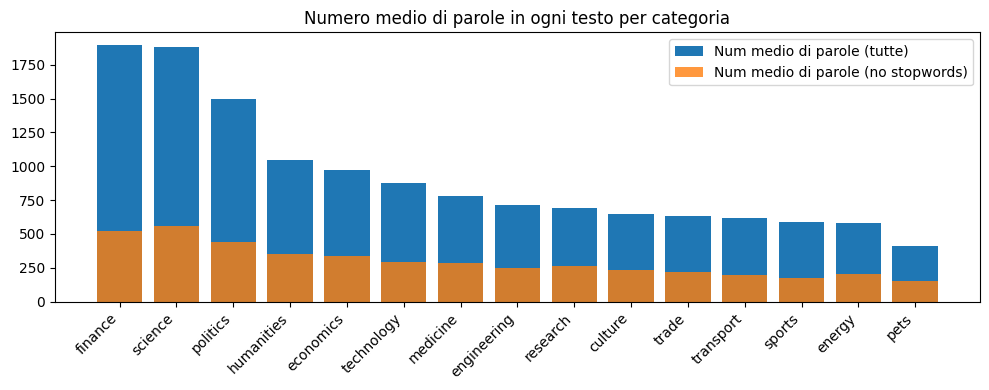

In [ ]:
avg_pd = avg_words.toPandas()
plt.figure(figsize=(10,4))
plt.bar(avg_pd["categoria"], avg_pd["avg_words"],label='Num medio di parole (tutte)') # parole medie
plt.bar(avg_pd["categoria"], avg_pd["avg_words_nostop"],label='Num medio di parole (no stopwords)', alpha=0.8) # parole medie escludendo stopwords
plt.xticks(rotation=45, ha='right')
plt.title("Numero medio di parole in ogni testo per categoria")
plt.tight_layout()
plt.legend()
display(plt.gcf())

plt.close()

Da questo istogramma si riesce a capire meglio la distribuzione della lunghezza media dei testi all'interno del dataset.  
In particolare dalla categoria engineering in poi si nota come la lunghezza dei testi sia più o meno simile (con una media tra le 600 e le 700 parole).   
Invece le altre categorie (da medicine in su) hanno un numero abbastanza maggiore di parole per testo, in particolare le prime due che sono finance e science.  
In termini di numero medio di parole (no stopwords) la differenza fra le categorie con testi più lunghi e quelle con testi meno lunghi sembra essere meno accentuata. Questo indicatore del fatto che testi di finance e science hanno in proporzione più stopwords rispetto ad altre categorie (science un po' meno rispetto a finance).
In termini di numero medio di parole, escludendo le stopwords, la categoria science sarebbe al primo posto.

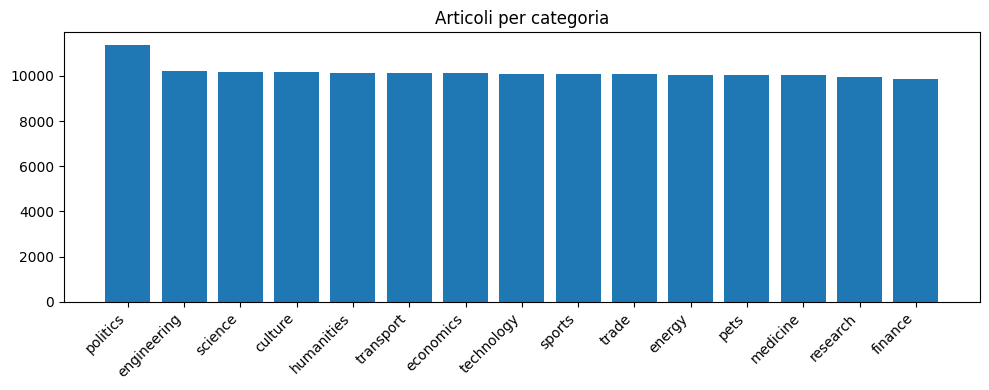

In [ ]:
articles_per_cat = wiki_stats.groupBy("categoria").count().orderBy(F.desc("count"))
apc_pd = articles_per_cat.toPandas()
plt.figure(figsize=(10,4))
plt.bar(apc_pd["categoria"], apc_pd["count"])
plt.xticks(rotation=45, ha='right')
plt.title("Articoli per categoria")
plt.tight_layout()
display(plt.gcf())
plt.close()

Qui vediamo visivamente come il numero di articoli (per categoria) all'interno del dataset sia abbastanza simile.   
Questo aiuterà poi il modello previsionale nella fase di addestramento, in quanto non sarà necessario applicare dei metodi correttivi (tipo oversampling, ecc) per ovviare al problema delle classi sbilanciate.

Adesso eseguo qualche analisi visiva più dettagliata sulla distribuzione dei testi all'interno di ciascuna categoria


=== politics ===
media = 1497.9, mediana = 389.0, std = 2259.9, skewness = 1.79


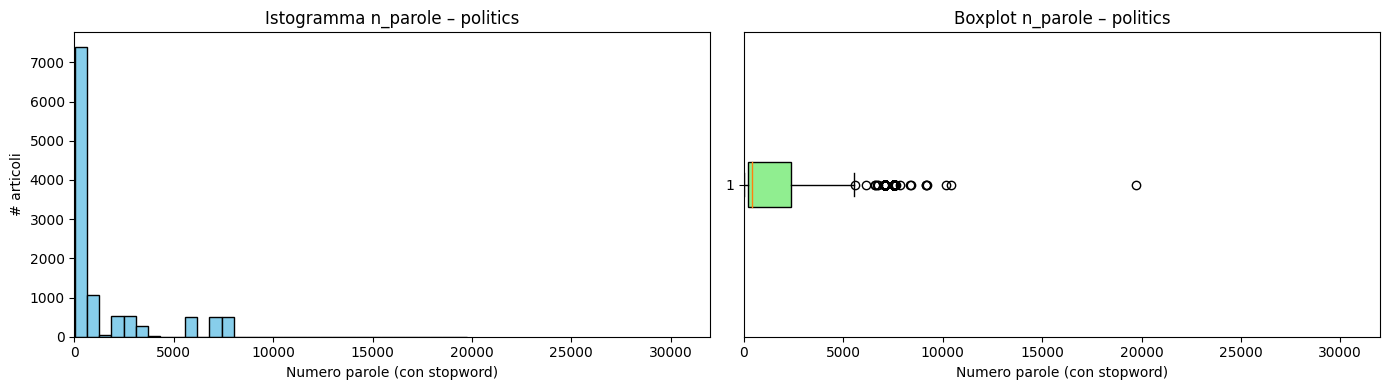


=== engineering ===
media = 715.0, mediana = 322.0, std = 1198.6, skewness = 4.04


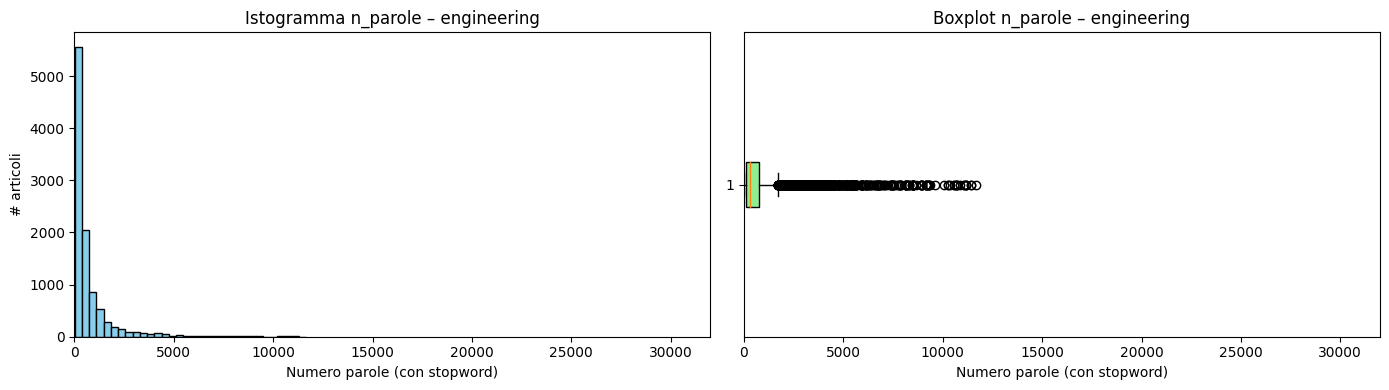


=== science ===
media = 1883.5, mediana = 772.5, std = 3282.9, skewness = 4.71


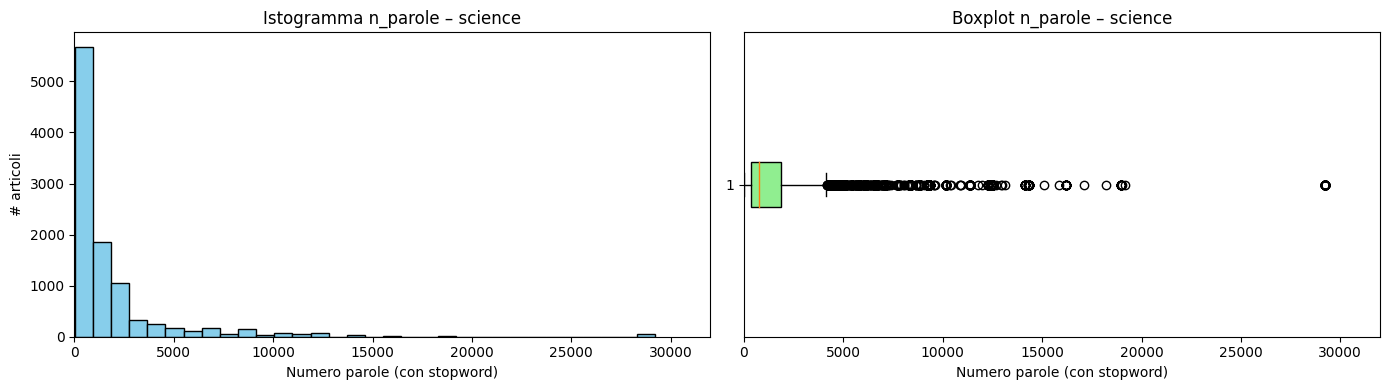


=== culture ===
media = 644.9, mediana = 326.0, std = 1052.4, skewness = 5.49


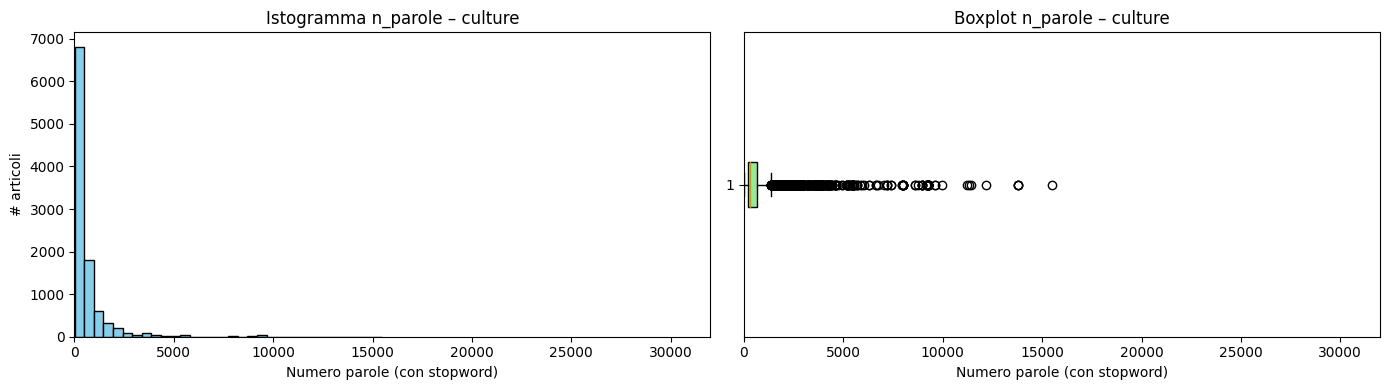


=== humanities ===
media = 1043.7, mediana = 558.0, std = 1834.7, skewness = 6.27


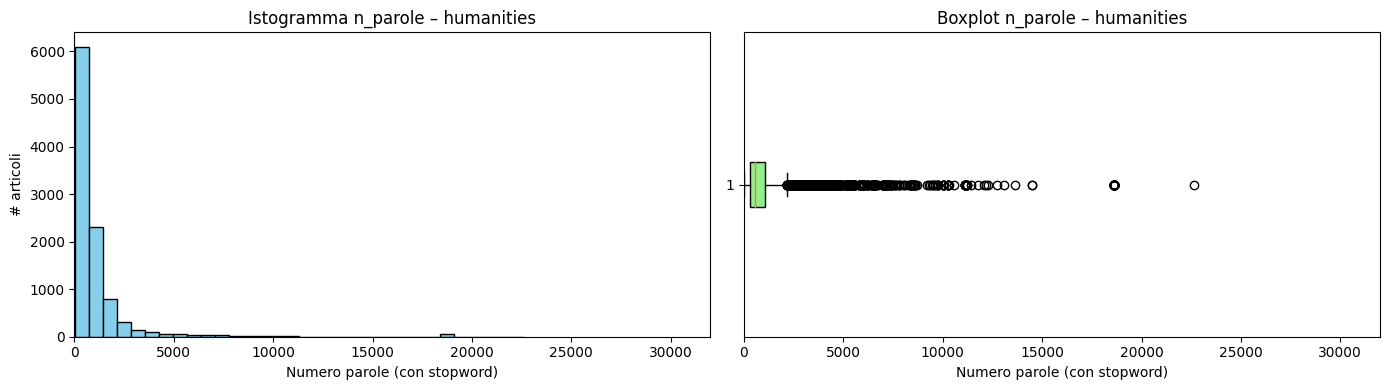


=== transport ===
media = 621.4, mediana = 199.0, std = 1314.4, skewness = 5.13


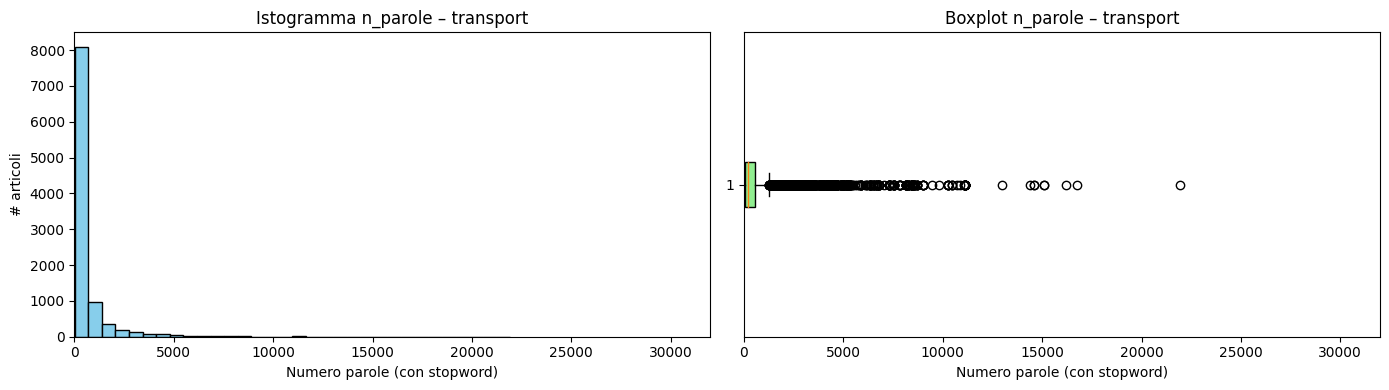


=== economics ===
media = 971.1, mediana = 549.0, std = 1473.2, skewness = 6.68


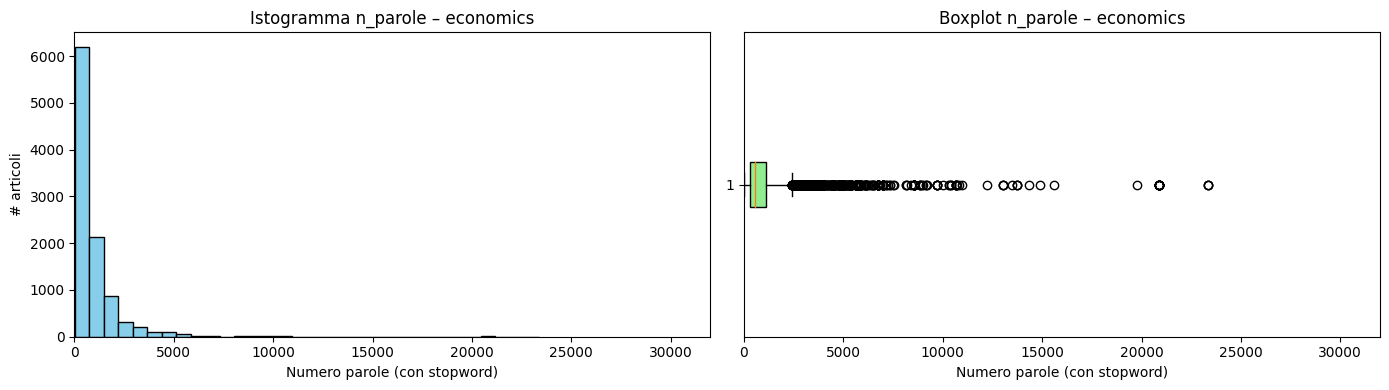


=== technology ===
media = 877.2, mediana = 473.0, std = 1295.5, skewness = 4.33


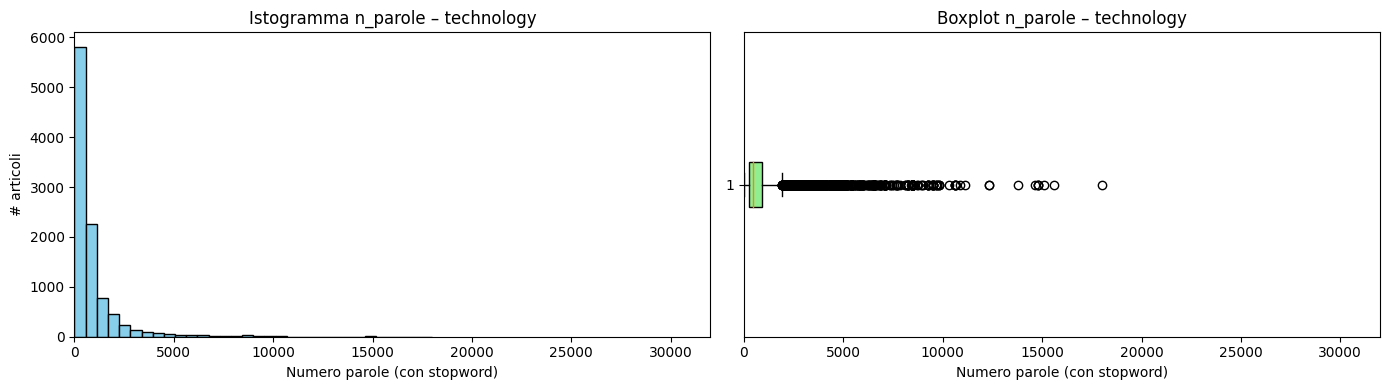


=== sports ===
media = 589.1, mediana = 148.0, std = 1500.4, skewness = 6.02


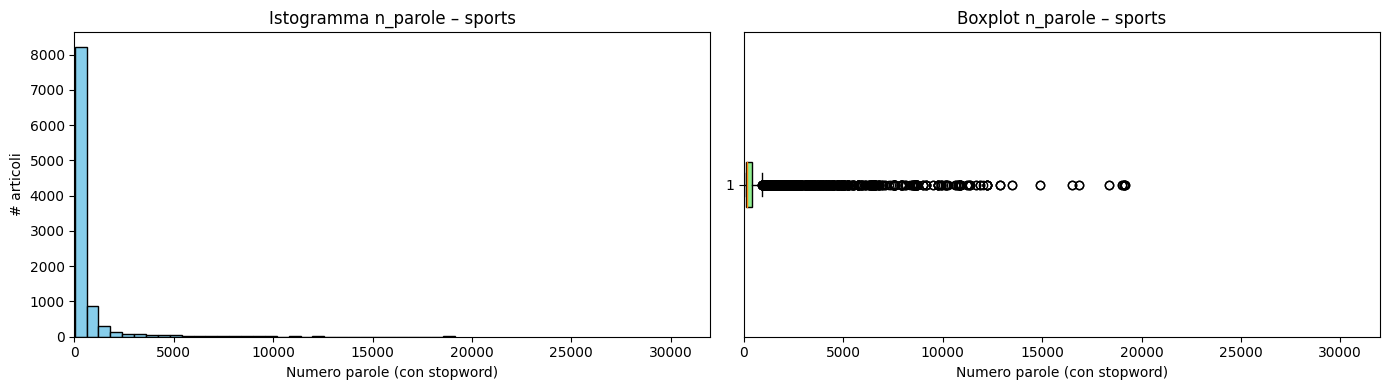


=== trade ===
media = 632.0, mediana = 217.0, std = 1258.5, skewness = 5.18


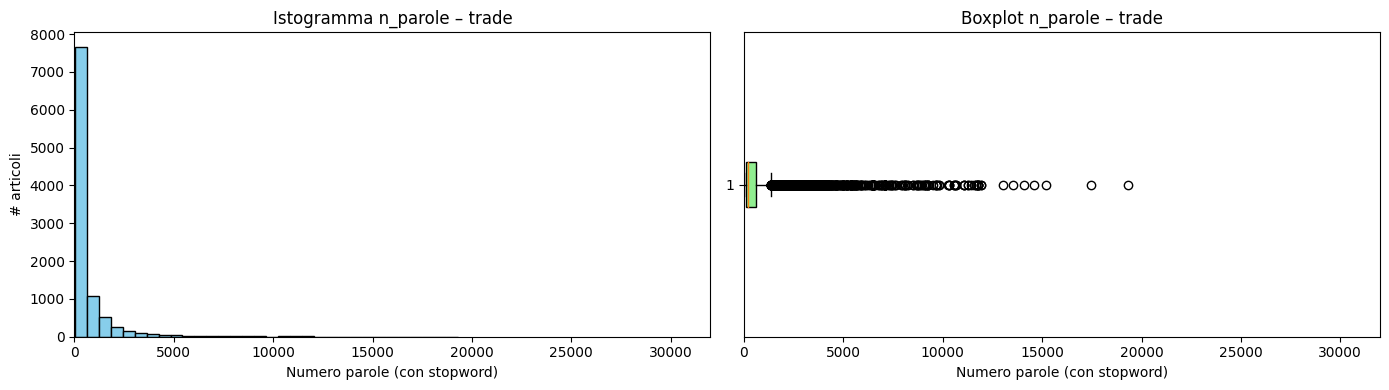


=== energy ===
media = 581.7, mediana = 292.0, std = 945.3, skewness = 6.50


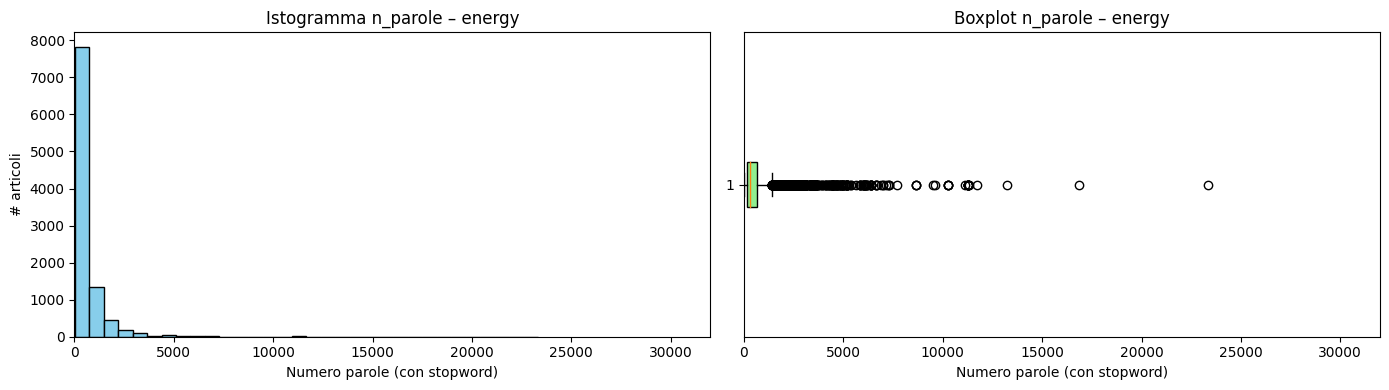


=== pets ===
media = 413.6, mediana = 139.0, std = 747.4, skewness = 4.97


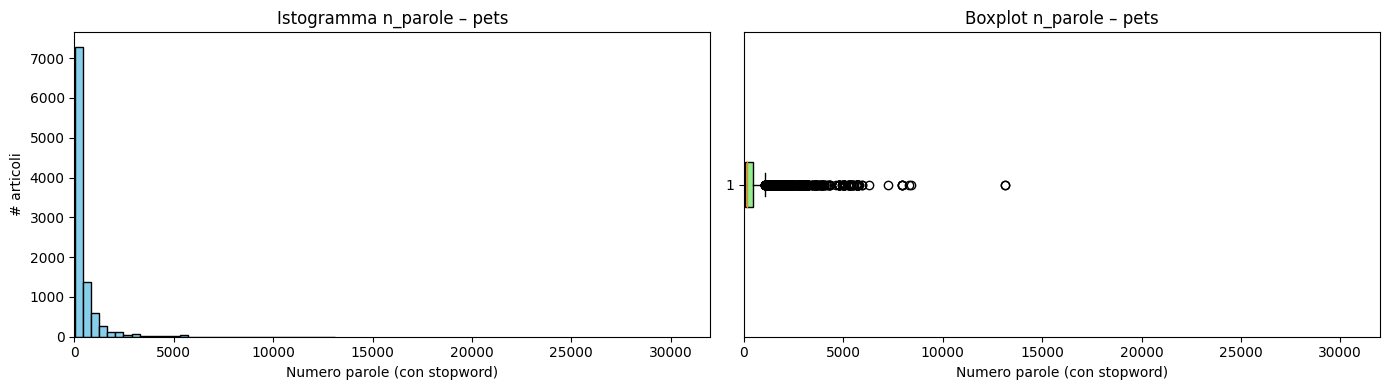


=== medicine ===
media = 783.6, mediana = 453.0, std = 1075.6, skewness = 4.90


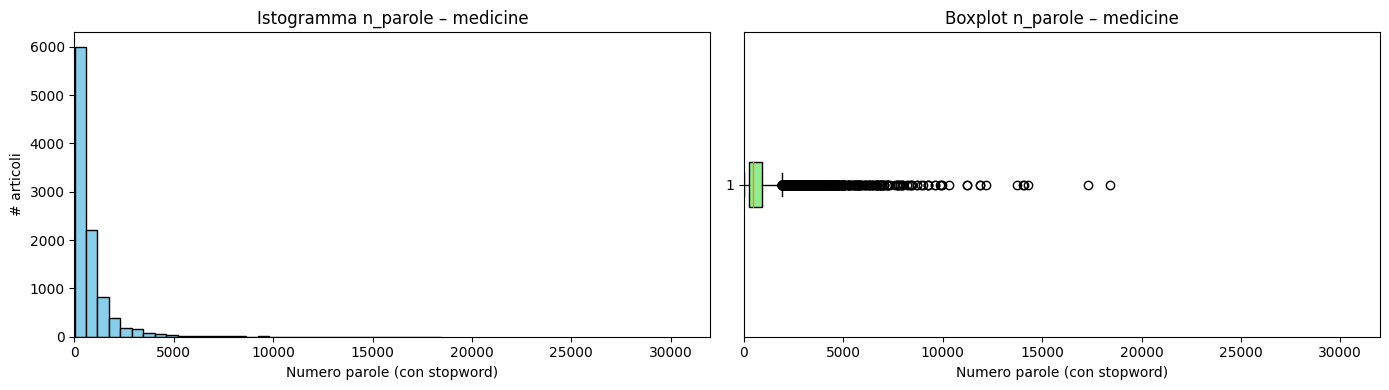


=== research ===
media = 694.6, mediana = 472.0, std = 901.2, skewness = 8.37


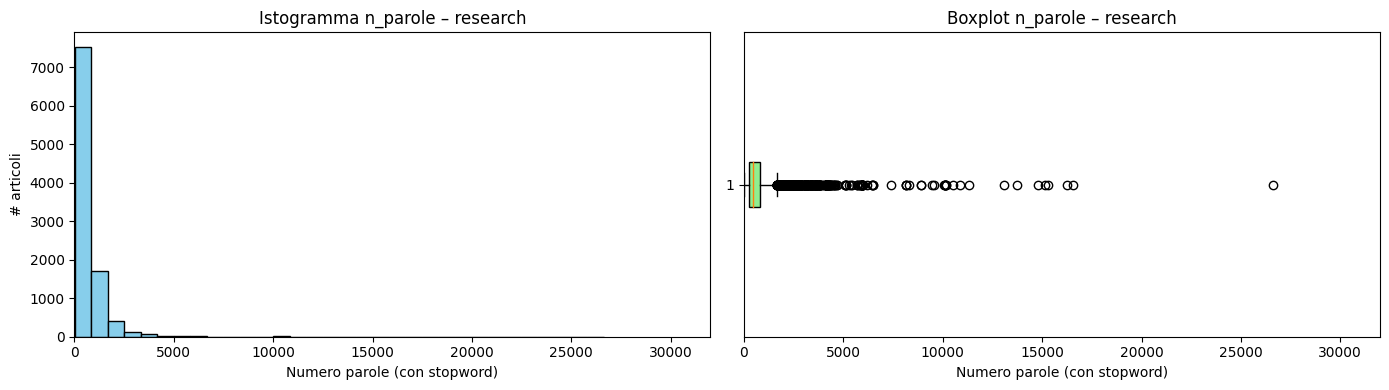


=== finance ===
media = 1893.9, mediana = 742.0, std = 3709.5, skewness = 4.18


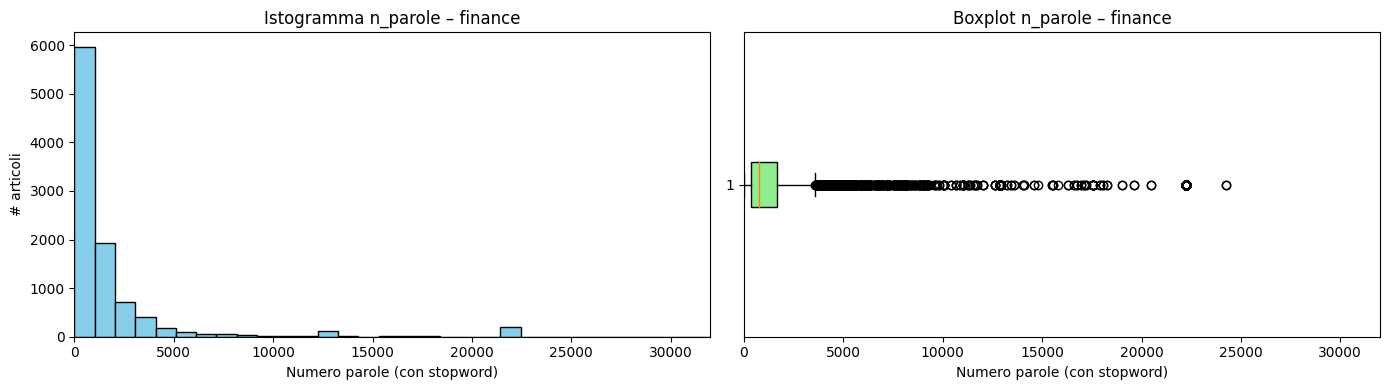

In [ ]:
# max parole per un articolo ~32k
X_MAX = 32000

cat15 = [r[0] for r in articles_per_cat.select("categoria").limit(15).collect()]

for c in cat15:
    pdf = (wiki_stats
           .filter(F.col("categoria") == F.lit(c))
           .select("n_words")
           .toPandas())

    if pdf.empty:
        continue

    values = pdf["n_words"].dropna().values

    # statistiche di base
    mean_val   = np.mean(values)
    median_val = np.median(values)
    std_val    = np.std(values)
    skew_val   = skew(values)

    print(f"\n=== {c} ===")
    print(f"media = {mean_val:.1f}, mediana = {median_val:.1f}, "
          f"std = {std_val:.1f}, skewness = {skew_val:.2f}")

    fig, axes = plt.subplots(1, 2, figsize=(14,4))

    # istogramma con asse X fisso
    axes[0].hist(values, bins=32, color="skyblue", edgecolor="black")
    axes[0].set_xlim(0, X_MAX)
    axes[0].set_title(f"Istogramma n_parole – {c}")
    axes[0].set_xlabel("Numero parole (con stopword)")
    axes[0].set_ylabel("# articoli")

    # boxplot
    axes[1].boxplot(values, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    axes[1].set_xlim(0, X_MAX)
    axes[1].set_title(f"Boxplot n_parole – {c}")
    axes[1].set_xlabel("Numero parole (con stopword)")

    plt.tight_layout()
    display(fig)
    plt.close()

Da questi grafici possiamo desumere come  tutte le distribuzioni siano in qualche modo simili. (L'unica distribuzione un po' bizzarra e quella della categoria politcs, che ha dei salti, forse qui sono stati duplicati dei testi)   
In particolare abbiamo sempre una skewness > 0 che ci indica come la distruzione sia concentrata sul lato sinistro (tanti articoli corti), come era lecito aspettarsi (infatti la media è sempre maggiore della mediana).   
In termini di mediana (indice più robusto rispetto alla presenza di outliers) vediamo come le categorie più prolisse rimangano sempre finance e science.  
Inoltre notiamo come le categorie transports, sports e pets abbiano una mediana molto molto bassa (inferiore alle 200 parole), segno che questi articoli tendenzialmente sono quelli più corti (a meno di outlier che aumentano la media).   
Mentre invece culture e energy, pur avendo una media molto bassa, hanno invece una mediana abbastanza alta, indice del fatto che ci sono pochi articoli molto corti e una maggior concentrazione di articoli di media lunghezza.  
Reserach e pets sono in assoluto le due categorie con la deviazione standard più bassa e quindi con gli articoli di lunghezza meno varia. (probabilmente dovuto al fatto che non ci sono così tanti outliers)

Procedo ora a creare le nuvole di parole per capire quali sono i termini più rilevanti per categoria.  
Limito a 30 il numero di parole per categoria, così da avere una visualizzazione più leggibile

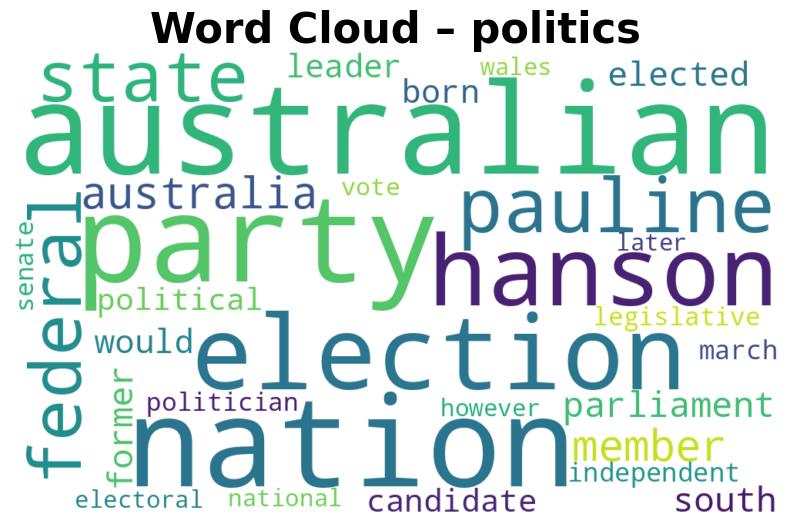

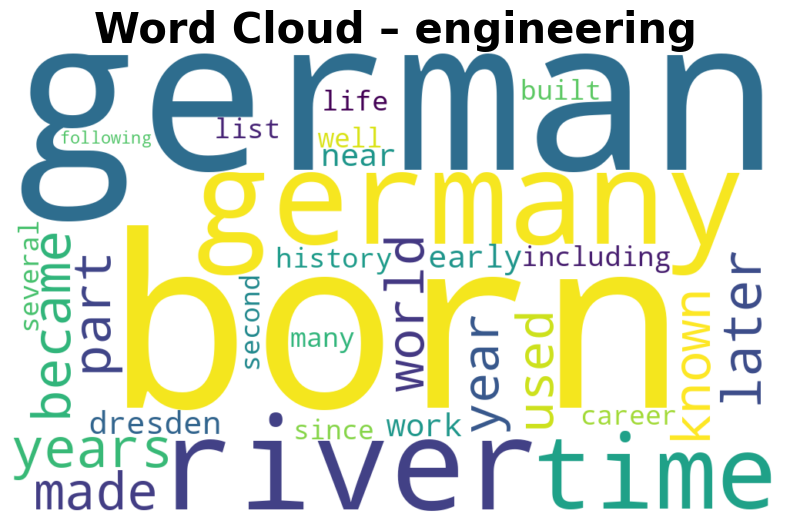

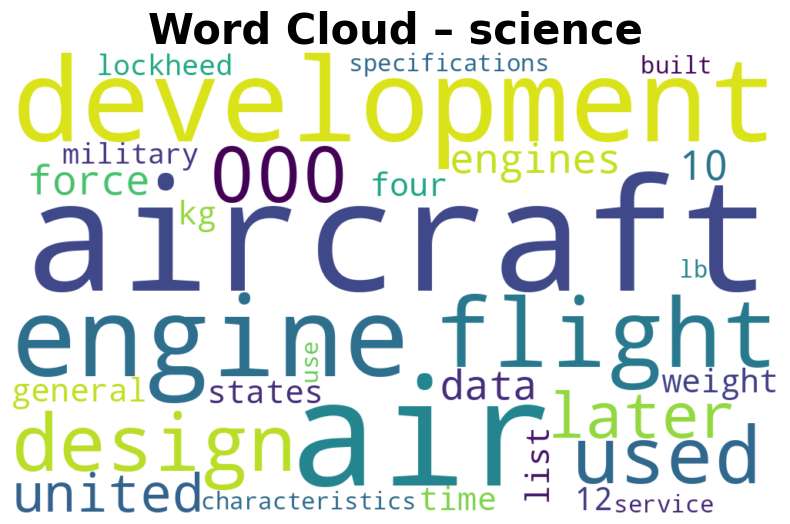

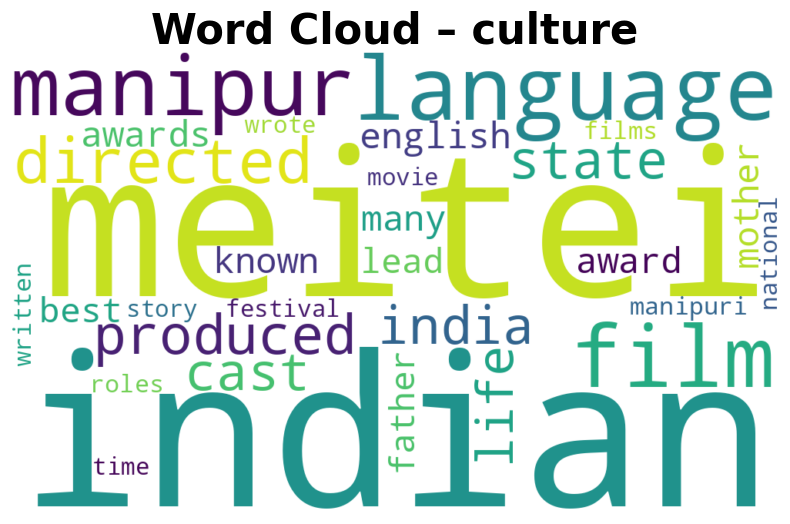

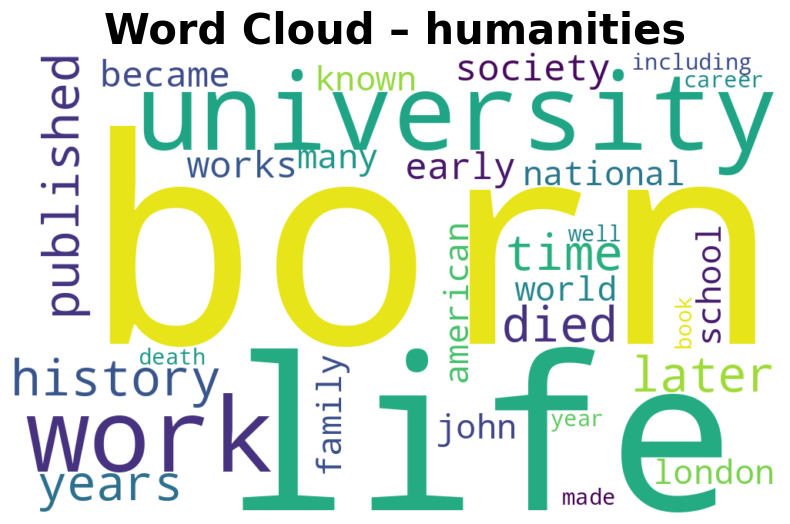

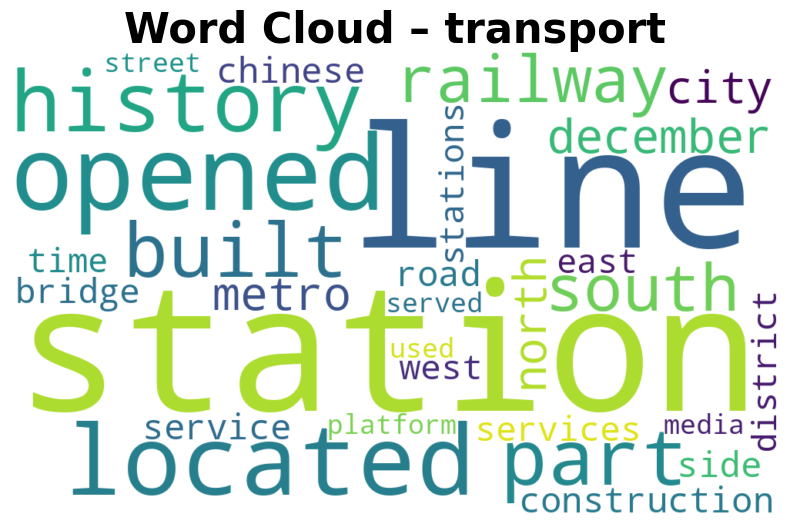

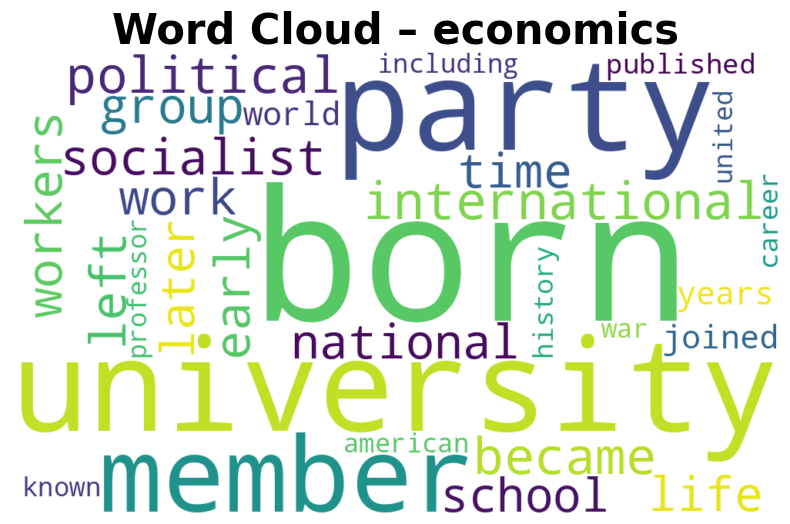

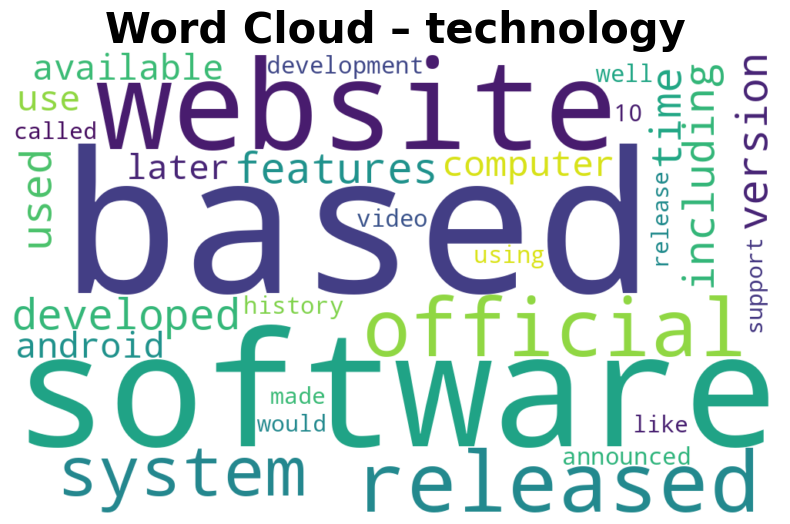

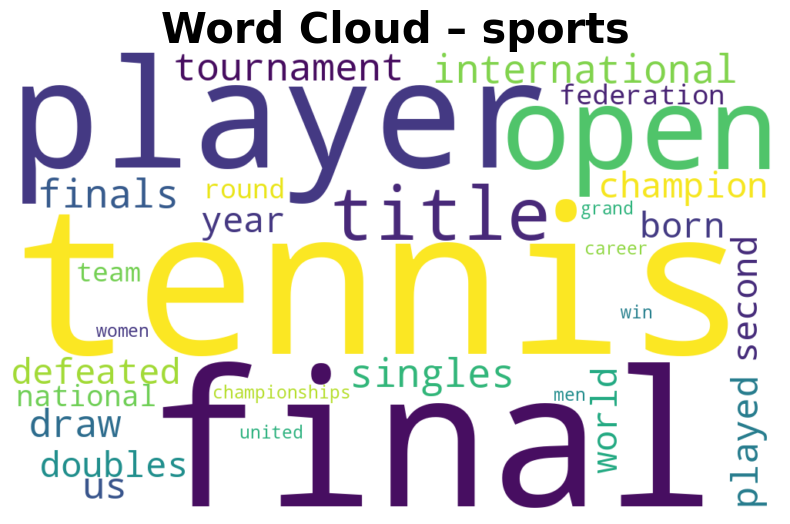

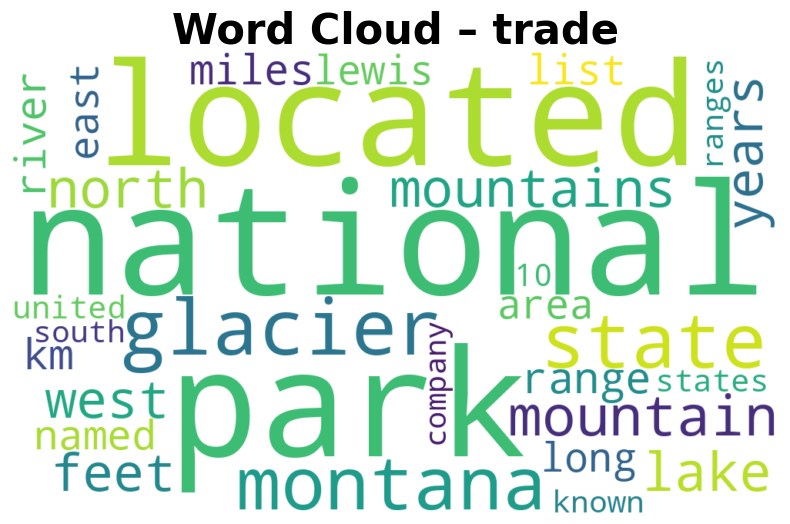

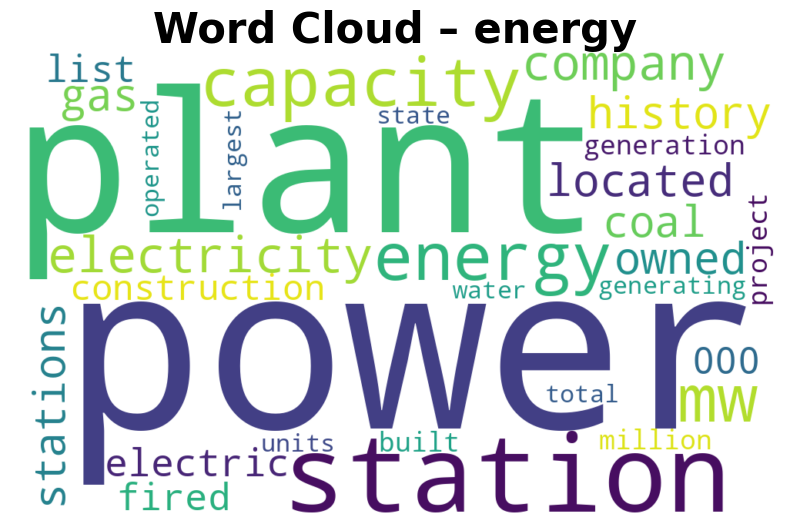

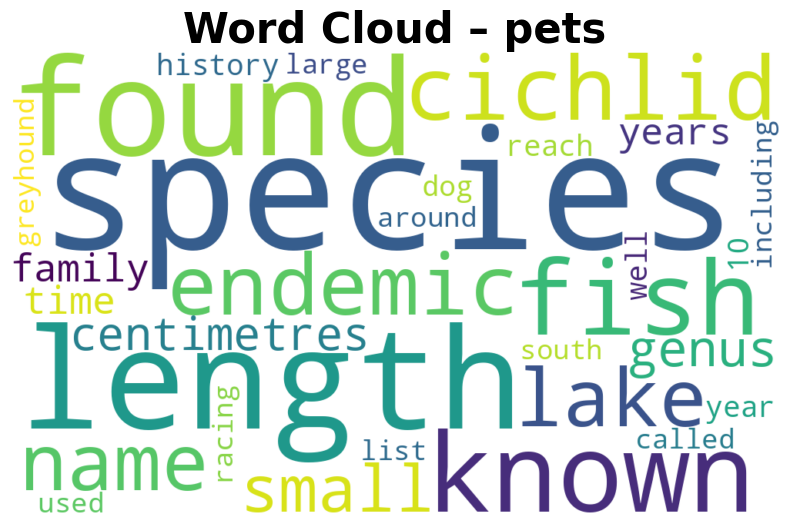

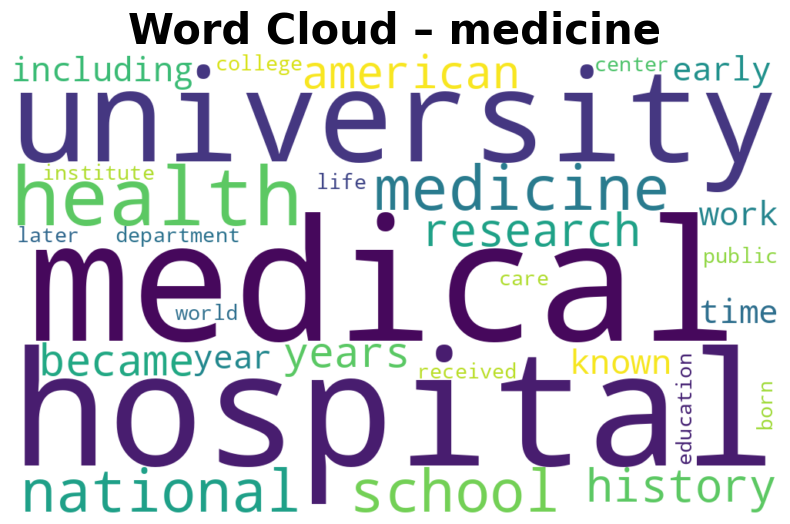

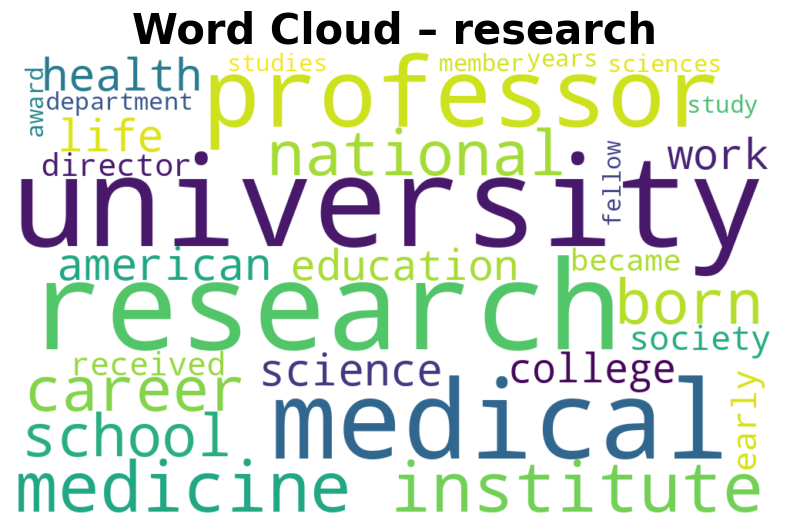

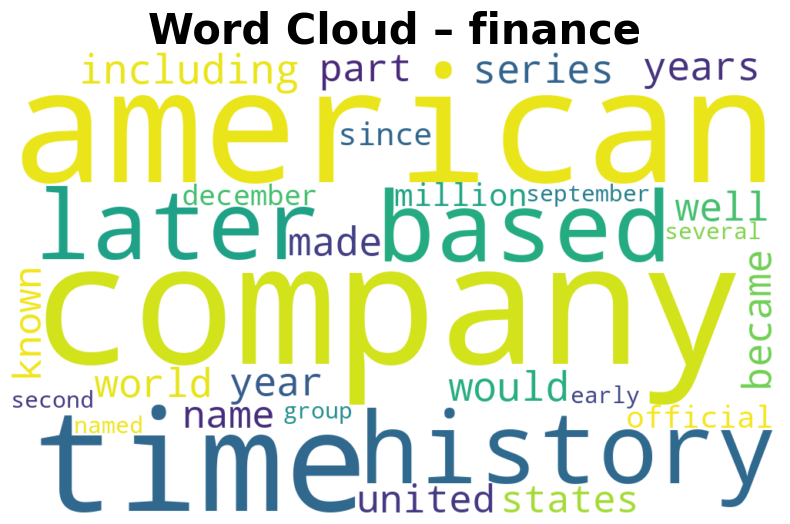

In [ ]:
# Term frequencies per categoria
top_terms = (
wiki_tok
.select("categoria", F.explode("tokens_nostop").alias("term"))
.groupBy("categoria", "term").count()
)

cats = [r[0] for r in articles_per_cat.select("categoria").limit(15).collect()]
for c in cats:
  freq_pdf = (top_terms.filter(F.col("categoria") == F.lit(c))
  .orderBy(F.desc("count"))
  .limit(30)
  .toPandas())
  freqs = {row["term"]: int(row["count"]) for _, row in freq_pdf.iterrows()}
  if not freqs:
    continue
  wc = WordCloud(width=1000, height=600, background_color="white").generate_from_frequencies(freqs)
  plt.figure(figsize=(10,6))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud – {c}", fontsize=30, fontweight='bold')
  display(plt.gcf())
  plt.close()

Di seguito un riassunto dei termini più usati per categoria con una possibile interpretazione:
- Politcs: A giudicare dai termini più utilizzati sembra che la maggior parte dei testi sia focalizzata su elezioni in Australia
- Engineering: Qui invece sembra che ci sia una grande riferimento a opere realizzate in Germania
- Science: Sembra essere focalizzata su articoli scientifici che riguardano velivoli
- Culture: Sembra affrontare temi sulla cultura Indiana
- Humanities: non vi è una chiara interpretazione
- Transport: Qui si parla di città, stazioni, treni, ponti, come era lecito aspettarsi
- Economics: Ci sono parole legate all'argomento (lavoro, università, socialista)
- Technology: qui forse più legata allo sviluppo di software e siti web
- Sports: chiaramente c'è una prevalenza di termini tennistici
- Trade: sembrano esserci più termini geografici (forse per indicare da dove provengono le merci e dove devono andare)
- Energy: parole collegate alla produzione di energia elettrica
- Pets: qui probabilmente si parla di pesci come animali domenstici
- Medicine: vi sono termini generici di ambito medico
- Research: sembra ci siano molti articoli di ricerca in ambito medico anche qui
- Finance: visione finanziaria più macroeconomica parlando di aziende grosse degli stati uniti e vengono citate le time series

Nella parte di codice seguente è possibile vedere la tabelle contenente tutti i vocaboli usati più frequentemente (fino al 200esimo per categoria)

In [ ]:
top_terms = (
    wiki_tok
      .select("categoria", F.explode("tokens_nostop").alias("term"))
      .groupBy("categoria", "term").count()
      .withColumn("rk", F.row_number().over(Window.partitionBy("categoria").orderBy(F.desc("count"))))
      .filter(F.col("rk") <= 200)  # tengo i top 200 termini per ciascuna categoria
)

# ora visualizziamo la tabella contente i termini più utilizzati per ciascuna categoria
top_terms.display()

categoria term count rk energy power 9030 1 energy plant 6127 2 energy station 5915 3 energy capacity 5481 4 energy mw 5397 5 energy energy 5388 6 energy electricity 5376 7 energy company 5256 8 energy located 4424 9 energy history 4232 10 energy owned 4188 11 energy gas 4133 12 energy coal 4020 13 energy stations 3956 14 energy electric 3820 15 energy 000 3699 16 energy fired 3682 17 energy list 3680 18 energy construction 3577 19 energy generation 3552 20 energy million 3471 21 energy built 3407 22 energy project 3315 23 energy generating 3214 24 energy total 3170 25 energy operated 3126 26 energy water 3059 27 energy units 3021 28 energy state 3016 29 energy largest 2974 30 energy year 2914 31 energy installed 2857 32 energy thermal 2803 33 energy part 2737 34 energy would 2729 35 energy system 2715 36 energy plants 2709 37 energy river 2665 38 energy 10 2623 39 energy national 2615 40 energy north 2613 41 energy unit 2611 42 energy supply 2602 43 energy corporation 2590 44 energy area 2587 45 energy site 2584 46 energy december 2582 47 energy based 2570 48 energy natural 2539 49 energy years 2535 50 energy south 2503 51 energy time 2494 52 energy used 2434 53 energy high 2434 54 energy operation 2434 55 energy since 2419 56 energy government 2412 57 energy began 2400 58 energy four 2385 59 energy grid 2355 60 energy completed 2348 61 energy march 2338 62 energy july 2327 63 energy june 2293 64 energy development 2273 65 energy near 2273 66 energy 50 2216 67 energy october 2209 68 energy due 2203 69 energy fuel 2183 70 energy april 2175 71 energy per 2174 72 energy 20 2174 73 energy 2010 2173 74 energy turbine 2169 75 energy january 2165 76 energy including 2163 77 energy website 2159 78 energy public 2153 79 energy second 2152 80 energy united 2148 81 energy 100 2148 82 energy use 2147 83 energy operations 2143 84 energy world 2139 85 energy november 2132 86 energy announced 2128 87 energy large 2117 88 energy 30 2111 89 energy later 2105 90 energy district 2095 91 energy cost 2072 92 energy official 2066 93 energy 2011 2059 94 energy 2012 2047 95 energy steam 2038 96 energy september 2030 97 energy 15 2016 98 energy city 2011 99 energy group 2009 100 energy operating 2008 101 energy following 1992 102 energy companies 1989 103 energy known 1979 104 energy subsidiary 1978 105 energy 2015 1976 106 energy 2016 1969 107 energy 12 1967 108 energy became 1966 109 energy 2009 1963 110 energy combined 1958 111 energy limited 1953 112 energy 2007 1944 113 energy turbines 1933 114 energy august 1930 115 energy service 1921 116 energy however 1914 117 energy west 1914 118 energy transmission 1913 119 energy 500 1896 120 energy 2008 1895 121 energy board 1895 122 energy 2014 1893 123 energy commissioned 1886 124 energy states 1868 125 energy billion 1853 126 energy february 1844 127 energy 25 1827 128 energy well 1827 129 energy started 1816 130 energy facility 1810 131 energy 2017 1806 132 energy oil 1797 133 energy 11 1796 134 energy around 1794 135 energy 2018 1774 136 energy km 1774 137 energy sold 1752 138 energy made 1741 139 energy 200 1735 140 energy 2019 1729 141 energy building 1722 142 energy production 1722 143 energy central 1703 144 energy several 1702 145 energy early 1687 146 energy 2020 1685 147 energy electrical 1675 148 energy approximately 1674 149 energy 2013 1667 150 energy local 1654 151 energy line 1651 152 energy east 1642 153 energy county 1617 154 energy planned 1616 155 energy 2005 1610 156 energy distribution 1607 157 energy 2006 1601 158 energy main 1583 159 energy major 1571 160 energy five 1571 161 energy within 1567 162 energy 16 1553 163 energy end 1547 164 energy constructed 1546 165 energy supplied 1538 166 energy generated 1532 167 energy industry 1530 168 energy utility 1523 169 energy environmental 1512 170 energy long 1508 171 energy 14 1507 172 energy 13 1502 173 energy output 1500 174 energy plans 1497 175 energy business 1496 176 energy generators 1491 177 energy former 1485 178 energy 300 1

### <font color="yellow">***Costruzione Modello di Classificazione***</font>

Costriusco la bag of words artigianalmente e trasferisco i dati su un pandas dataframe

(perdo il fatto di utilizzare un dataframe spark distribuito, ma non vedo molte alternative, sempre per il problema di stare utlizzando un cluster serverless)

Comincio con la costruzione del vocabolario

In [ ]:
# Frequenze  per vocabolario
term_counts = (
    wiki_tok.select(F.explode("tokens_nostop").alias("term"))
            .groupBy("term").count()
            .orderBy(F.desc("count"))
)

# Prendo i top 5000 termini
vocab = [r["term"] for r in term_counts.limit(5000).collect()]

In [ ]:
# Seleziono solo le colonne utili per il modello
df_small = wiki_tok.select("categoria", "tokens_nostop")

sample_pd = df_small.toPandas()

# Unisco i token in un testo unico
sample_pd["text"] = sample_pd["tokens_nostop"].apply(lambda toks: " ".join(toks))

Ora parto con la creazione vera e propria del modello di classificazione.  
In questo caso proverò 3 modelli distinti per poi stabilire quale ha le performance migliori.   
I modelli sono:
- Regressione Logistica
- Vettori di supporto (Linear SVC)
- Complement Naive Bayes (Versione migliorata del Multinomial NB tradizionale, anche se qui le classi sono bilanciate quindi non dovrebbero esserci miglioramenti significativi)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_pd["text"], sample_pd["categoria"], test_size=0.2, random_state=42, stratify=sample_pd["categoria"]
)

# uso TF-IDF la vettorizzazione del testo
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2)) # vedo se togliere i bigrammi
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

# ====== 1) Logistic Regression (baseline) ======
lr = LogisticRegression(max_iter=1000, multi_class="multinomial")
lr.fit(Xtr, y_train)
pred_lr = lr.predict(Xte)

# ====== 2) LinearSVC ======
svm = LinearSVC()
svm.fit(Xtr, y_train)
pred_svm = svm.predict(Xte)

# ====== 3) Complement Naive Bayes  ======
cnb = ComplementNB()
cnb.fit(Xtr, y_train)
pred_cnb = cnb.predict(Xte)

# ====== metriche a confronto ======
def report(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f} | F1-weighted: {f1w:.4f}")
    print(classification_report(y_true, y_pred))

report("LogisticRegression", y_test, pred_lr)
report("LinearSVC", y_test, pred_svm)
report("ComplementNB", y_test, pred_cnb)


=== LogisticRegression ===
Accuracy: 0.9418 | F1-weighted: 0.9419
              precision    recall  f1-score   support

     culture       0.98      0.96      0.97      2031
   economics       0.95      0.97      0.96      2022
      energy       0.97      0.96      0.96      2007
 engineering       0.92      0.92      0.92      2044
     finance       0.88      0.93      0.90      1973
  humanities       0.94      0.97      0.95      2023
    medicine       0.85      0.79      0.82      2003
        pets       0.99      0.98      0.98      2003
    politics       1.00      0.99      0.99      2272
    research       0.83      0.87      0.85      1986
     science       0.95      0.94      0.94      2033
      sports       0.98      0.98      0.98      2013
  technology       0.95      0.96      0.95      2016
       trade       0.98      0.95      0.96      2013
   transport       0.96      0.97      0.97      2022

    accuracy                           0.94     30461
   macro avg 

Dopo aver visionato i risultati ottenuti dai 3 modelli si vede come il modello Linear SVC e la regressione logistica performino molto meglio rispetto a Naive Bayes.  (94% di accuracy contro un 86%, quindi una differenza sostanziale)  
Nel complesso comunque i risultati migliori si ottengono con Linear SVC (accuracy di quasi 0.95). Questo semplice modello di calssificazione è stato in grado di apprendere (è così identificare) molto bene la varie categorie di testo.   
Le uniche due categorie in cui c'è un po' di difficoltà nell'identificazione sono Research e Medicine. Difficoltà probabilmente dovuta al fatto che gli articoli di ricerca sembravano essere molto incentrati sull'ambito medico (come avevamo notato dal grafico ottenuto con il WordCloud) e quindi termini medici erano presenti in entrambe le categorie.
